In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pykalman import KalmanFilter
from mpl_toolkits.mplot3d import Axes3D

%config InlineBackend.figure_format = 'svg' 

np.random.seed(11)

# Define Observations

In [146]:
n_timesteps = 100
x1 = np.linspace(0, 3 * np.pi, n_timesteps)
x2 = np.linspace(-3 * np.pi, 3 * np.pi, n_timesteps)
sin_observations = 10 * np.sin(x1) + 5 * np.random.randn(n_timesteps)
x_line_observations = x2 + 10 * np.random.randn(n_timesteps)

# Define different filters

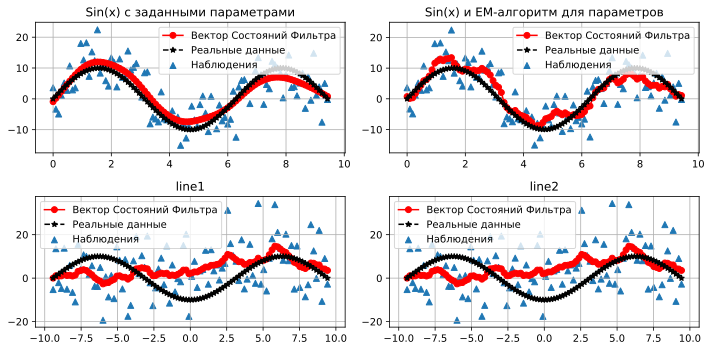

In [147]:
filters_pipeline = (
    (
        'Sin(x) с заданными параметрами',
        KalmanFilter(transition_matrices=np.array([[1, 1], [0, 1]]), transition_covariance=0.01 * np.eye(2)),
        x1,
        sin_observations
    ),
    (
        'Sin(x) и EM-алгоритм для параметров',
        KalmanFilter(initial_state_mean=0, n_dim_obs=1),
        x1,
        sin_observations
    ),
    (
        'line1',
        KalmanFilter(initial_state_mean=0, n_dim_obs=1),
        x2,
        x_line_observations
    ),
    (
        'line2',
        KalmanFilter(initial_state_mean=0, n_dim_obs=1),
        x2,
        x_line_observations
    )
)
# fit filters
for _filter in filters_pipeline:
    _filter[1].em(_filter[3])

# plot results
fig, axs = plt.subplots(2, 2, figsize=(10,5))

for ax, _filter in zip(axs.ravel(), filters_pipeline):
    _states = _filter[1].smooth(_filter[3])[0]
    ax.plot(_filter[2], _states[:, 0], linestyle='-', marker='o', color='r', label='Вектор Состояний Фильтра')
    ax.scatter(_filter[2], _filter[3], marker='^', label='Наблюдения')
    ax.plot(_filter[2], 10 * np.sin(x1), linestyle='--', marker='*', color='black', label='Реальные данные')
    ax.grid(True)
    ax.set_title(_filter[0])
    ax.legend()
fig.tight_layout()
plt.savefig('charts\\sin_test.pdf', dpi=500, quality=100)

In [139]:
filters_pipeline[0][1].__dict__

{'transition_matrices': array([[1, 1],
        [0, 1]]),
 'observation_matrices': array([[1., 0.]]),
 'transition_covariance': array([[ 0.01212579, -0.00190182],
        [-0.00190182,  0.03351354]]),
 'observation_covariance': array([[25.75665873]]),
 'transition_offsets': array([0., 0.]),
 'observation_offsets': array([0.]),
 'initial_state_mean': array([-1.44667223,  1.07106481]),
 'initial_state_covariance': array([[ 0.17861029, -0.02768759],
        [-0.02768759,  0.01081875]]),
 'random_state': None,
 'em_vars': ['transition_covariance',
  'observation_covariance',
  'initial_state_mean',
  'initial_state_covariance'],
 'n_dim_state': 2,
 'n_dim_obs': 1}

observation_matrices : H_k
transition_matrices : F_k
transition_covariance: R_k


In [81]:
x1 = 20 * np.sin(np.linspace(0, 3 * np.pi, n_timesteps)) + 0.5 * np.random.randn(n_timesteps)
x2 = 20 * np.sin(np.linspace(np.pi / 2, 3 * np.pi, n_timesteps)) + 0.5 * np.random.randn(n_timesteps)
x3 = 20 * np.sin(np.linspace(2*np.pi, 3 * np.pi, n_timesteps)) + 0.5 * np.random.randn(n_timesteps)

In [100]:
X = np.vstack((x1, x2, x2)).T

In [142]:
np.array(((sin_observations.mean())))

array(2.24279084)

In [143]:
kf = KalmanFilter(transition_matrices=np.array([[1, 1], [0, 1]]),
                  transition_covariance=0.01 * np.eye(2))

states_pred = kf.em(sin_observations)
states_pred = kf.smooth(sin_observations)

In [144]:
kf.__dict__

{'transition_matrices': array([[1, 1],
        [0, 1]]),
 'observation_matrices': array([[1., 0.]]),
 'transition_covariance': array([[ 0.01212579, -0.00190182],
        [-0.00190182,  0.03351354]]),
 'observation_covariance': array([[25.75665873]]),
 'transition_offsets': array([0., 0.]),
 'observation_offsets': array([0.]),
 'initial_state_mean': array([-1.44667223,  1.07106481]),
 'initial_state_covariance': array([[ 0.17861029, -0.02768759],
        [-0.02768759,  0.01081875]]),
 'random_state': None,
 'em_vars': ['transition_covariance',
  'observation_covariance',
  'initial_state_mean',
  'initial_state_covariance'],
 'n_dim_state': 2,
 'n_dim_obs': 1}

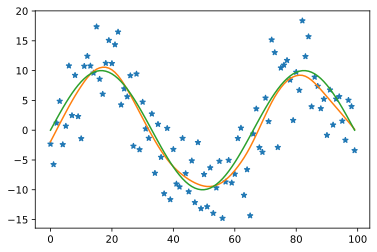

In [129]:
plt.plot(sin_observations, '*')
plt.plot(states_pred[0][:, 0])
plt.plot(10 * np.sin(x1))
plt.savefig('test.png')

In [ ]:
transition_covariance
observation_covariance


In [118]:
sin_observations.var()

295.0583569571395

In [113]:
kf.__dict__

{'transition_matrices': array([[1, 1],
        [0, 1]]),
 'observation_matrices': array([[1., 0.]]),
 'transition_covariance': array([[ 0.01809934, -0.0108046 ],
        [-0.0108046 ,  0.15391701]]),
 'observation_covariance': array([[106.22019613]]),
 'transition_offsets': array([0., 0.]),
 'observation_offsets': array([0.]),
 'initial_state_mean': array([0.11543757, 2.5993823 ]),
 'initial_state_covariance': array([[ 0.23265199, -0.04206704],
        [-0.04206704,  0.02013012]]),
 'random_state': None,
 'em_vars': ['transition_covariance',
  'observation_covariance',
  'initial_state_mean',
  'initial_state_covariance'],
 'n_dim_state': 2,
 'n_dim_obs': 1}

In [ ]:
states_pred.reshape(1, 100)[0]

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
ax.scatter(x, y, z2)
ax.scatter(x, y, states_pred.reshape(1, 100)[0])

In [ ]:
x = np.linspace(-3 * np.pi, 3 * np.pi, n_timesteps)
observations2 = -np.power(x, 2) + 10 * np.random.randn(n_timesteps)

In [ ]:
kf = KalmanFilter(transition_matrices=np.array([[1, 1], [0, 1]]),
                   transition_covariance=0.01 * np.eye(2))

# kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)

# You can use the Kalman Filter immediately without fitting, but its estimates
# may not be as good as if you fit first.
states_pred = kf.em(observations2)
states_pred = kf.smooth(observations2)[0]

In [ ]:
plt.scatter(x, observations2, marker='^', label='Наблюдения')
plt.plot(x, states_pred[:, 0], linestyle='-', marker='o', color='r', label='Истинный вектор состояний')
plt.title('Пример Сглаживания на Синтетических Данных', y=-0.15)
plt.grid()
plt.legend()
plt.savefig('charts\\sin_test.png', dpi=500, quality=100)

In [ ]:
kf.__dict__